In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from modeling import preprocess, train, evaluate, optimize
from itertools import product

np.random.seed(42)

In [2]:
df = pd.read_csv('data/processed/clean_and_filled.csv')

Training models...: 100%|██████████| 4/4 [00:00<00:00, 41.23it/s]


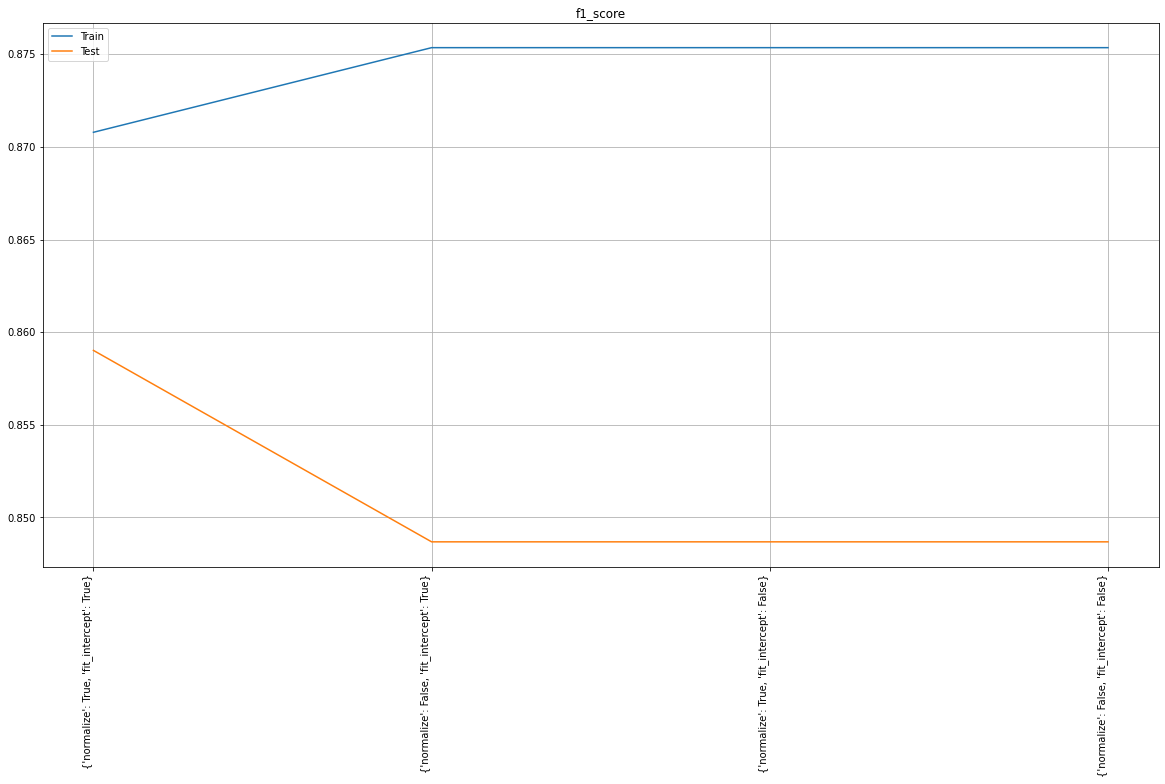

{'f1_score': 0.8590163934426229, 'accuracy_score': 0.8407407407407408, 'precision_score': 0.8291139240506329, 'recall_score': 0.891156462585034}
{'normalize': True, 'fit_intercept': True}


In [3]:
test_size = 0.3
linear_model, linear_res, linear_best_score, linear_best_params = optimize(df, test_size, model_constructor=LinearRegression, param_list=[{'normalize': True, 'fit_intercept': True},
                                                {'normalize': False, 'fit_intercept': True},
                                                {'normalize': True, 'fit_intercept': False},
                                                {'normalize': False, 'fit_intercept': False}])

print(linear_best_score)
print(linear_best_params)

Training models...: 100%|██████████| 100/100 [00:09<00:00, 10.58it/s]


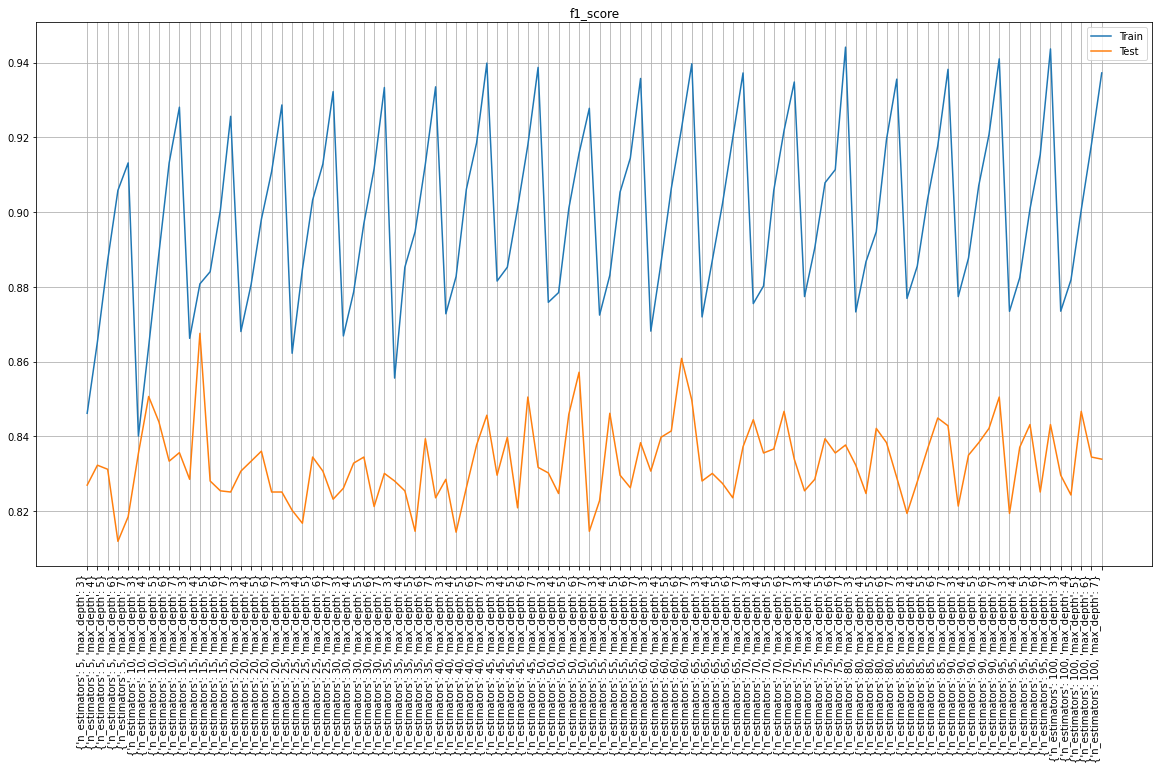

{'f1_score': 0.8675496688741723, 'accuracy_score': 0.8518518518518519, 'precision_score': 0.8451612903225807, 'recall_score': 0.891156462585034}
{'n_estimators': 15, 'max_depth': 4}


In [4]:
rf_params = [{'n_estimators': n, 'max_depth': d} for n, d in product(np.arange(5, 101, 5), np.arange(3, 8))]
rf_model, rf_result, rf_best_score, rf_best_params = optimize(df, test_size, model_constructor=RandomForestClassifier, param_list=rf_params)

print(rf_best_score)
print(rf_best_params)

Training models...: 100%|██████████| 200/200 [01:17<00:00,  2.57it/s]


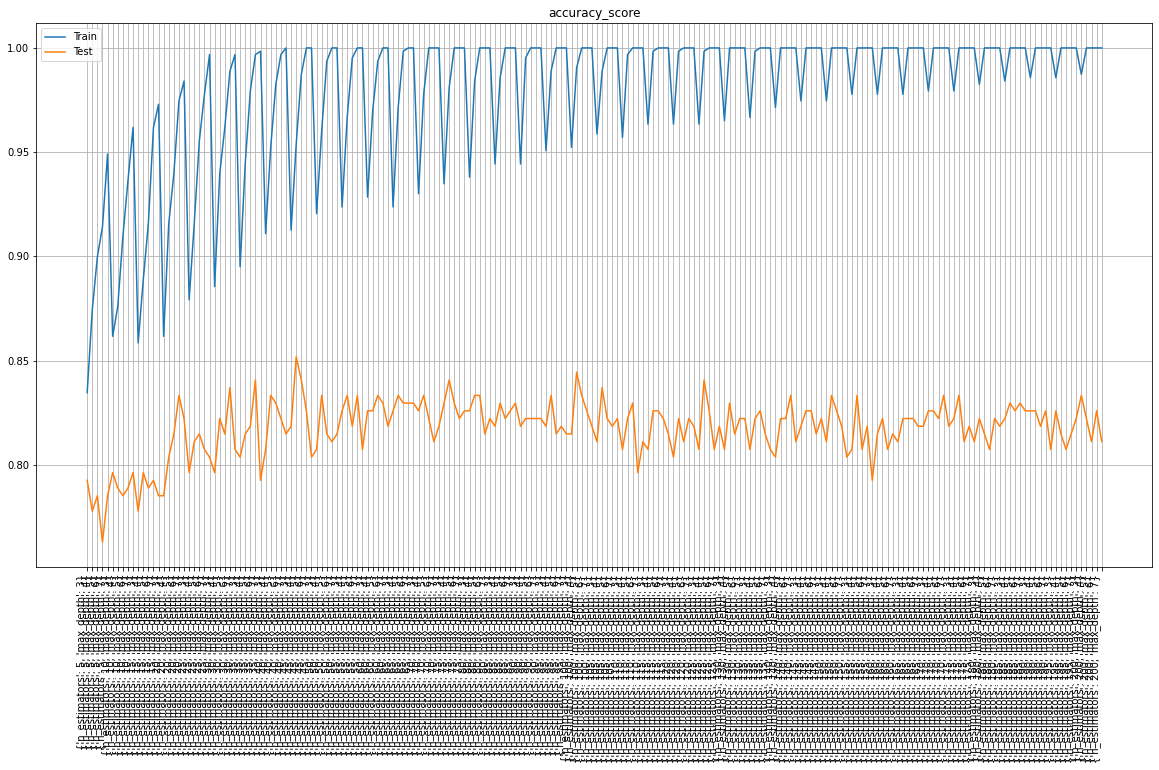

{'f1_score': 0.8675496688741723, 'accuracy_score': 0.8518518518518519, 'precision_score': 0.8451612903225807, 'recall_score': 0.891156462585034} {'n_estimators': 45, 'max_depth': 4}


In [5]:
gb_params = [{'n_estimators': n, 'max_depth': d} for n, d in product(np.arange(5, 201, 5), np.arange(3, 8))]
gb_model, gb_result, gb_best_score, gb_best_params = optimize(df, test_size, model_constructor=GradientBoostingClassifier, param_list=gb_params, eval_metric='accuracy_score')
print(gb_best_score, gb_best_params)

                   linear  random_forest  gradient_boost
f1_score         0.859016       0.867550        0.867550
accuracy_score   0.840741       0.851852        0.851852
precision_score  0.829114       0.845161        0.845161
recall_score     0.891156       0.891156        0.891156


(0.0, 1.0)

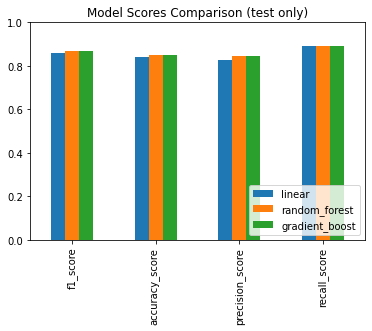

In [16]:
performance_df = pd.DataFrame([linear_best_score, rf_best_score, gb_best_score], index=['linear', 'random_forest', 'gradient_boost']).T
print(performance_df)
performance_df.plot.bar()
plt.title('Model Scores Comparison (test only)')
plt.legend(loc=4)
plt.ylim([0, 1])

In [17]:
imp_df = pd.DataFrame(index=df.drop('target', axis=1).columns, data=zip(rf_model.feature_importances_, gb_model.feature_importances_, linear_model.coef_.reshape(-1)), columns=['rf_importance', 'gb_importance', 'linear_coef'])

In [20]:
imp_df.sort_values('rf_importance', ascending=False)

,rf_importance,gb_importance,linear_coef
ex_angina,0.117341,0.024702,1.088550e-01
st_dep,0.101980,0.053670,9.221014e-02
cp_type_no_pain,0.082896,0.287356,-2.476609e+12
chol,0.073167,0.076881,-3.745189e-05
sex_F,0.066660,0.012619,7.696575e+08
heart_rate_peak,0.063024,0.026065,-1.531536e-03
cp_type_atypical_angina,0.058443,0.022937,-2.476609e+12
vessels_colored,0.045758,0.081472,1.348294e-01
met,0.041461,0.045732,-9.831136e-04
age,0.039274,0.056955,1.966628e-03
